<a href="https://colab.research.google.com/github/Benedictakel/Predicting-House-Prices-with-PyTorch/blob/main/Predicting_House_Prices_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pandas seaborn matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Convert to DataFrame for exploration (optional)
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [4]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

model = RegressionModel(X_train.shape[1])


In [5]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [6]:
epochs = 100
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 5.3778
Epoch [20/100], Loss: 4.7702
Epoch [30/100], Loss: 4.2665
Epoch [40/100], Loss: 3.8442
Epoch [50/100], Loss: 3.4770
Epoch [60/100], Loss: 3.1482
Epoch [70/100], Loss: 2.8510
Epoch [80/100], Loss: 2.5818
Epoch [90/100], Loss: 2.3386
Epoch [100/100], Loss: 2.1197


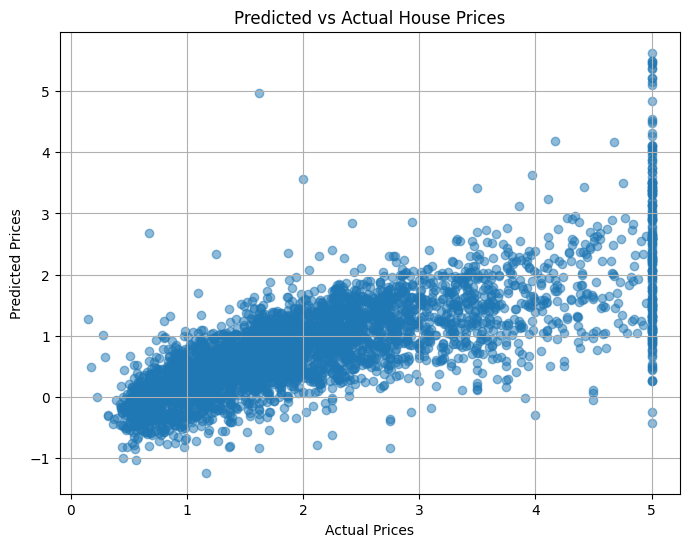

In [7]:
model.eval()
predictions = model(X_test_tensor).detach().numpy()
true_values = y_test_tensor.numpy()

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(true_values, predictions, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.grid(True)
plt.show()


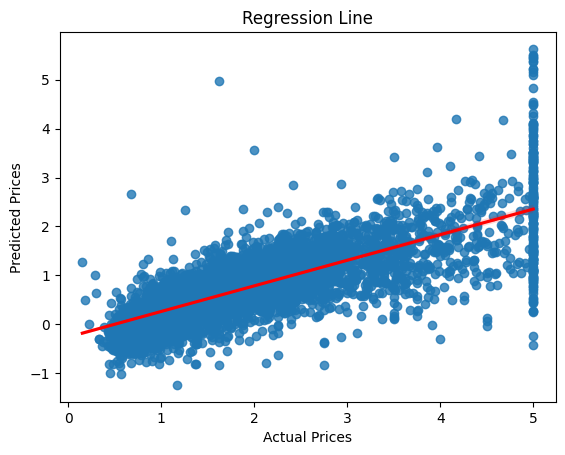

In [8]:
sns.regplot(x=true_values.flatten(), y=predictions.flatten(), line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Line")
plt.show()


In [9]:
def predict_house_price(input_features):
    model.eval()
    input_tensor = torch.tensor(scaler.transform([input_features]), dtype=torch.float32)
    prediction = model(input_tensor).item()
    return prediction

# Example usage:
example = X_test[0]
print("Predicted price:", predict_house_price(example))


Predicted price: -21.09986114501953
